In [10]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, griddata, RegularGridInterpolator
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("testData5.txt", names=['detected', 'actual', 'zone'])
print(data)

single = data[(data['zone'] < 6) | ((data['zone'] >= 11) & (data['zone'] <= 15))]
triple = data[(data['zone'] >= 6) & (data['zone'] <= 10)]
double = data[(data['zone'] >= 16)]

single_count = np.where(single.detected == single.actual)[0].size
single_percent = single_count / single.shape[0]

triple_count = np.where(triple.detected == triple.actual)[0].size
triple_percent = triple_count / triple.shape[0]

double_count = np.where(double.detected == double.actual)[0].size
double_percent = double_count / double.shape[0]

percent = (single_count + double_count + triple_count) / data.shape[0]

triple_bad = triple[triple['detected'] != triple['actual']]
double_bad = double[double['detected'] != double['actual']]
percent



     detected  actual  zone
0           1       1     1
1           1       1     2
2           1       1     3
3           1       1     4
4           1       1     5
..        ...     ...   ...
395        20      40    16
396        40      40    17
397        40      40    18
398        40      40    19
399        40      40    20

[400 rows x 3 columns]


0.7975

In [ ]:
from scipy.spatial.distance import mahalanobis

df = pd.read_csv('testData2.txt', skiprows=1, usecols=[2, 3, 4, 5])

# Extract the detected and actual x and y coordinates
detected_x = df.iloc[:, 0]
actual_x = df.iloc[:, 1]
detected_y = df.iloc[:, 2]
actual_y = df.iloc[:, 3]

calibration_points = np.column_stack((actual_x, actual_y))
mean = np.mean(calibration_points, axis=0)
covariance = np.cov(calibration_points, rowvar=False)

detected_coordinates = np.column_stack((detected_x, detected_y))
actual_coordinates = np.column_stack((actual_x, actual_y))
actual_distances = [mahalanobis(actual_coordinates[i], mean, np.linalg.inv(covariance)) for i in range(len(actual_coordinates))]
detected_distances = [mahalanobis(detected_coordinates[i], mean, np.linalg.inv(covariance)) for i in range(len(detected_coordinates))]
dist_diff = np.array(actual_distances) - np.array(detected_distances)
dist_diff

In [9]:
x_grid = np.linspace(min(detected_x),max(detected_x), 100)
y_grid = np.linspace(min(detected_y),max(detected_y), 100)
xx, yy = np.meshgrid(x_grid, y_grid)
dist_interp = interp1d(detected_x, detected_y, dist_diff, (xx, yy), method='cubic')

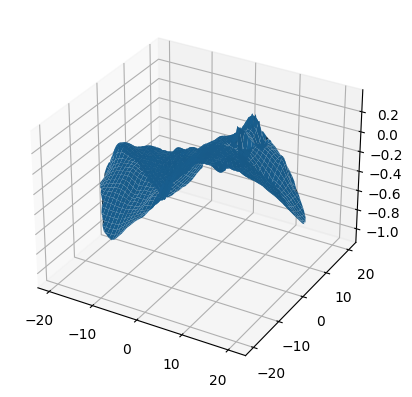

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x_grid, y_grid)
dist_surf = ax.plot_surface(X, Y, dist_interp)
plt.show()